In [1]:
import numpy as np
import sklearn.datasets as sd
import pylab as pl
import scipy.optimize as so
import sklearn.manifold as sm
import scipy.spatial.distance as ssd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Укажите директорию, куда будут скачиваться картинки

In [2]:
DATA_DIR = "./"
dataset = sd.fetch_olivetti_faces(data_home=DATA_DIR)

downloading Olivetti faces from http://cs.nyu.edu/~roweis/data/olivettifaces.mat to ./


In [35]:
def plot_dataset(dataset, x, y, margin=50, frame=2000., imsize=64):
    x1 = (x - x.min()) * (frame / (x.max() - x.min())) + margin
    y1 = (y - y.min()) * (frame / (y.max() - y.min())) + margin
    image = np.zeros((x1.max() + margin + imsize, y1.max() + margin + imsize)) + 1
    print "Image size is %dx%d" % image.shape
    for k in xrange(dataset.images.shape[0]):
        image[x1[k]:x1[k]+64, y1[k]:y1[k]+64] = dataset.images[k]
    pl.figure(figsize=(20, 20))
    pl.imshow(image, cmap="Greys_r")
    pl.axis("off")
    pl.show()


Нарисуем сначала картинки в случайных местах

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Image size is 2164x2164


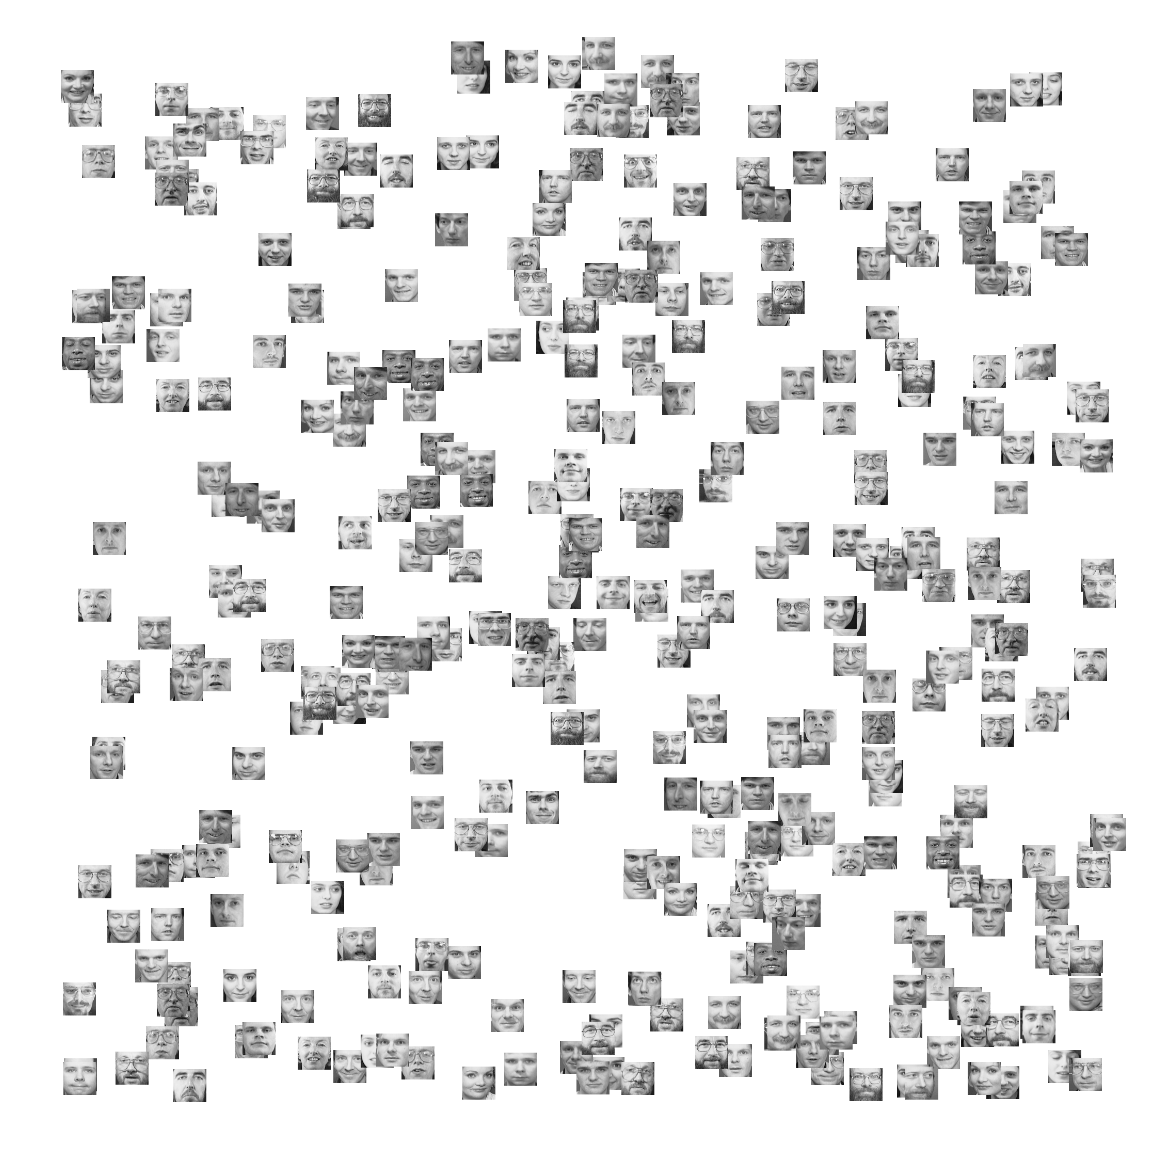

In [36]:
x_rnd, y_rnd = np.random.randint(0, 2000, len(dataset.target)), np.random.randint(0, 2000, len(dataset.target))
plot_dataset(dataset, x_rnd, y_rnd)

# http://scikit-learn.org/stable/modules/manifold.html

### Isomap

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Image size is 2164x2164


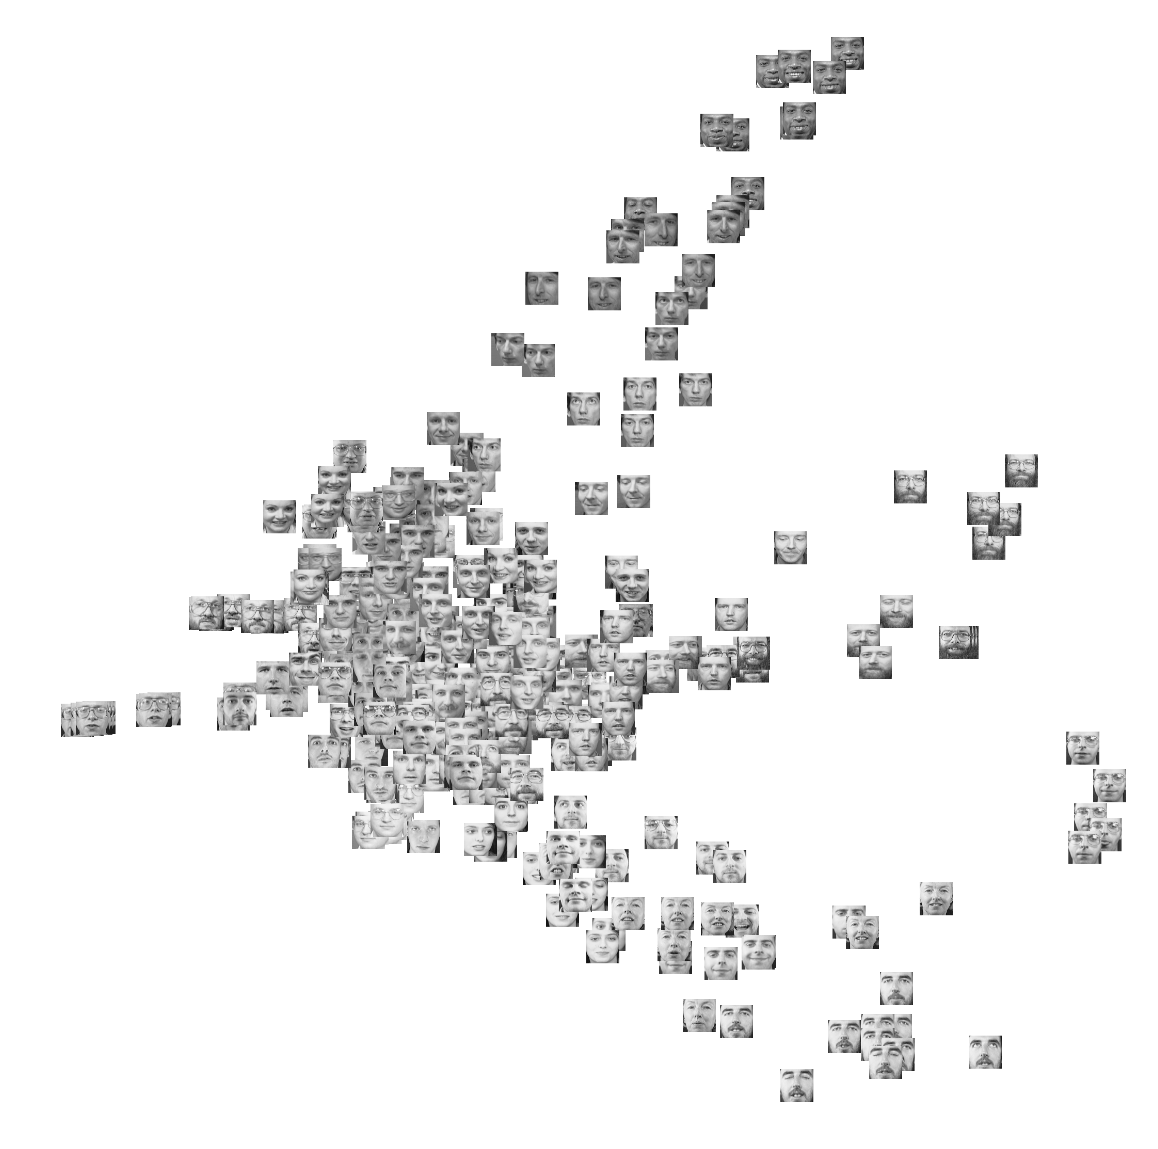

In [40]:
isomap = sm.Isomap(n_components=2)
z = isomap.fit_transform(np.asfarray(dataset.data, dtype='float'))
plot_dataset(dataset, z[:, 0], z[:, 1])

### Locally Linear Embedding

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Image size is 2164x2164


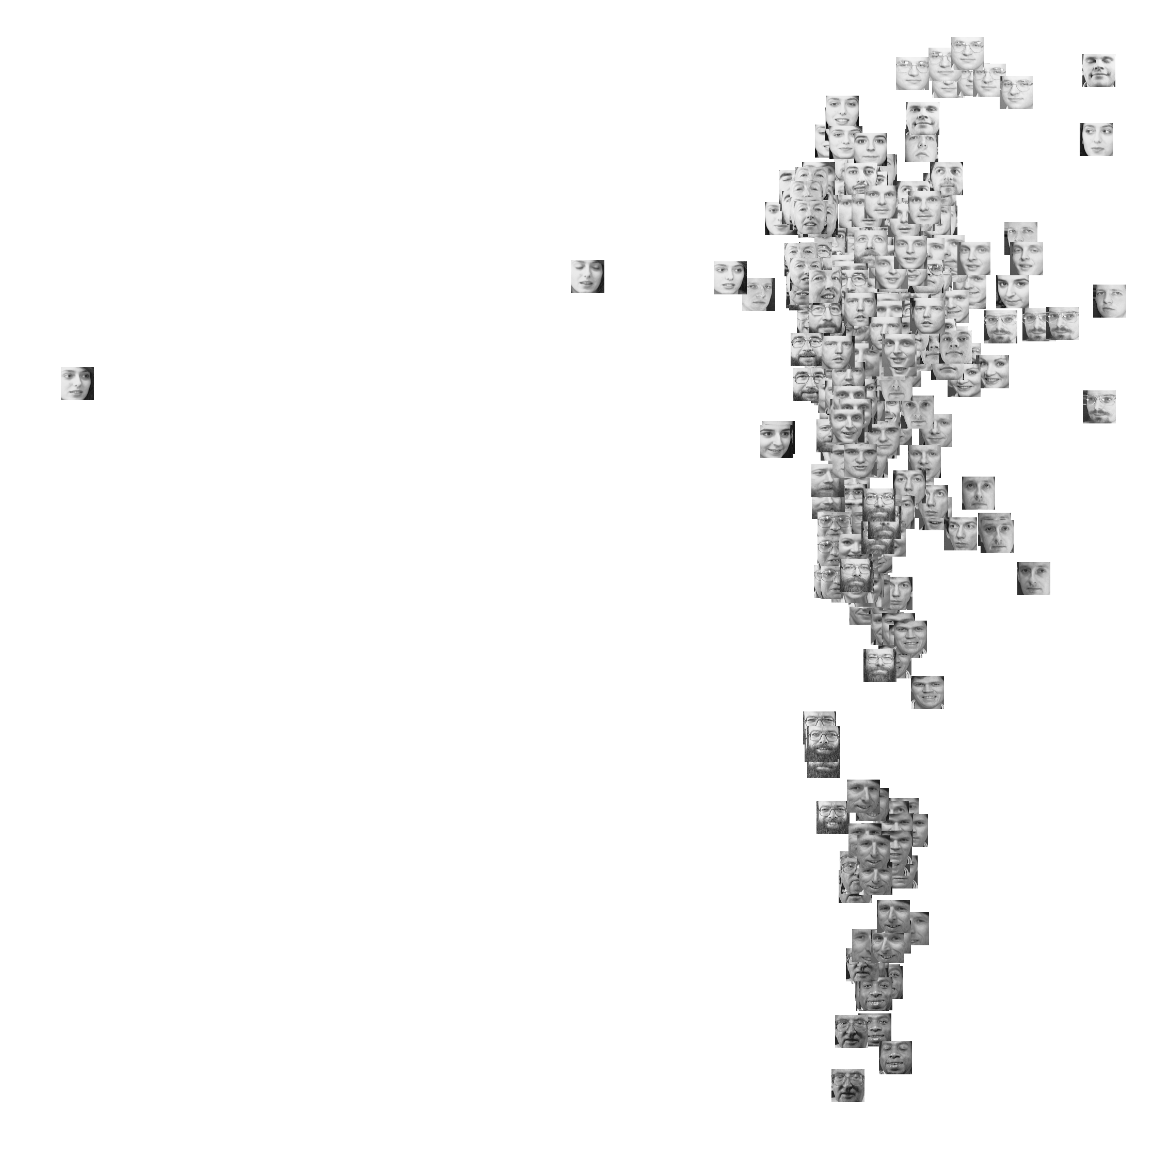

In [54]:
lle = sm.LocallyLinearEmbedding(n_components=2, method='hessian', n_neighbors=100)
z = lle.fit_transform(np.asfarray(dataset.data, dtype='float'))
plot_dataset(dataset, z[:, 0], z[:, 1])

### Spectral Embedding

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Image size is 2164x2164


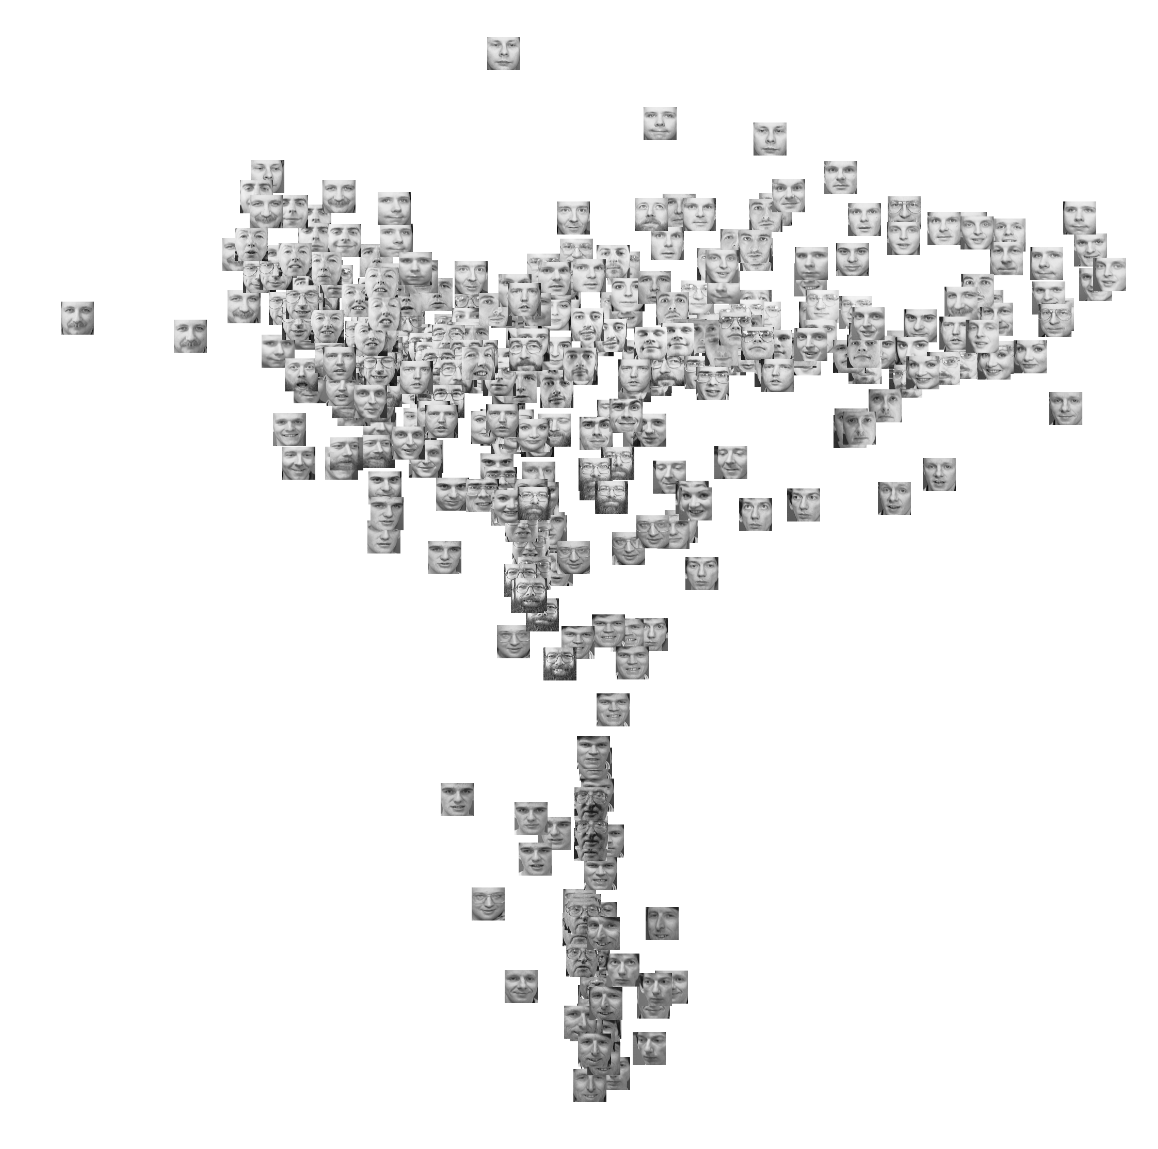

In [51]:
se = sm.SpectralEmbedding(n_components=2)
z = se.fit_transform(np.asfarray(dataset.data, dtype='float'))
plot_dataset(dataset, z[:, 0], z[:, 1])

###  MDS

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Image size is 2164x2164


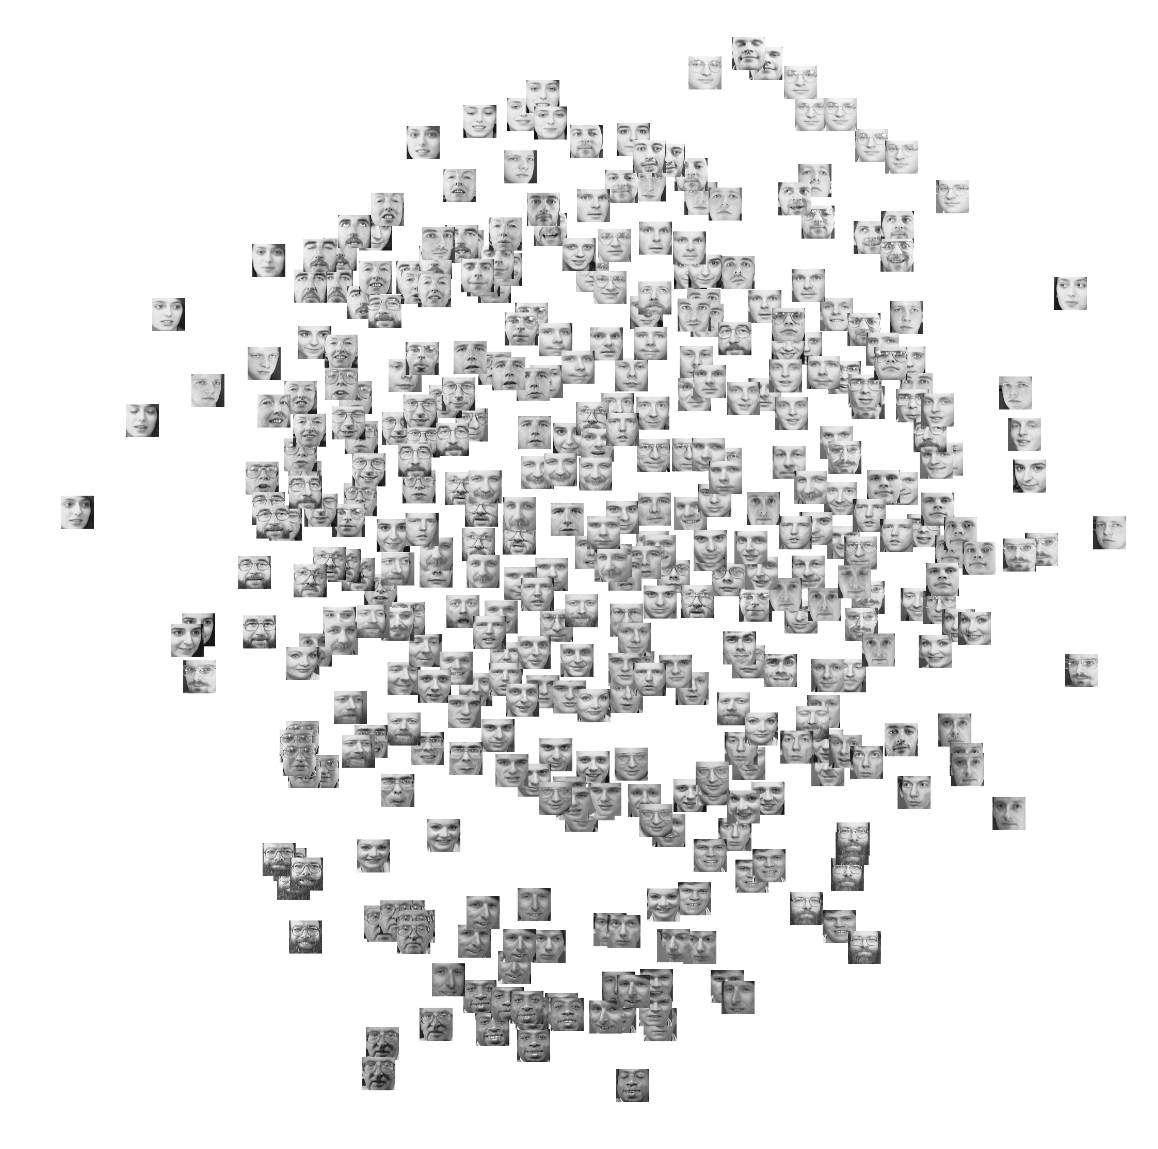

In [53]:
tsne = sm.MDS(n_components=2)
z = tsne.fit_transform(np.asfarray(dataset.data, dtype='float'))
plot_dataset(dataset, z[:, 0], z[:, 1])

### t-SNE 

Применим t-SNE. Для этого просто используем готовую реализацию из sklearn. Как результат зависит от perplexity? (Проверьте несколько значений в диапазоне 5-500)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 3.938678
[t-SNE] Error after 100 iterations with early exaggeration: 0.813289
[t-SNE] Error after 175 iterations: 1.176963
Image size is 2164x2164


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


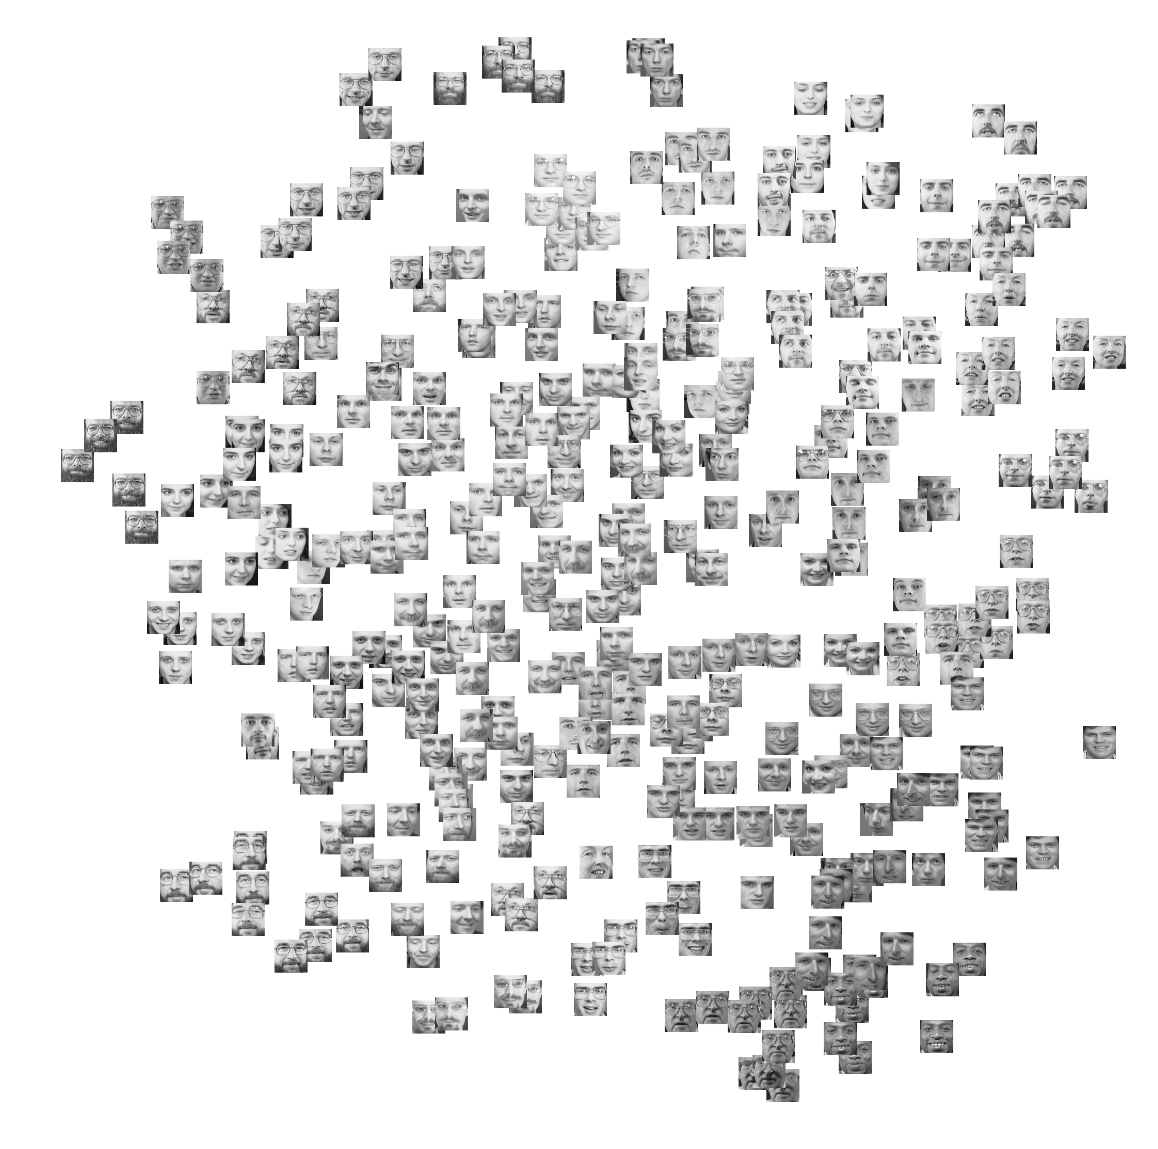

In [41]:
tsne = sm.TSNE(n_components=2, perplexity=30.0, verbose=1, n_iter=1000)
z = tsne.fit_transform(np.asfarray(dataset.data, dtype='float'))
plot_dataset(dataset, z[:, 0], z[:, 1])

Сравните визуализации. Какой результат (выглядит) лучше?